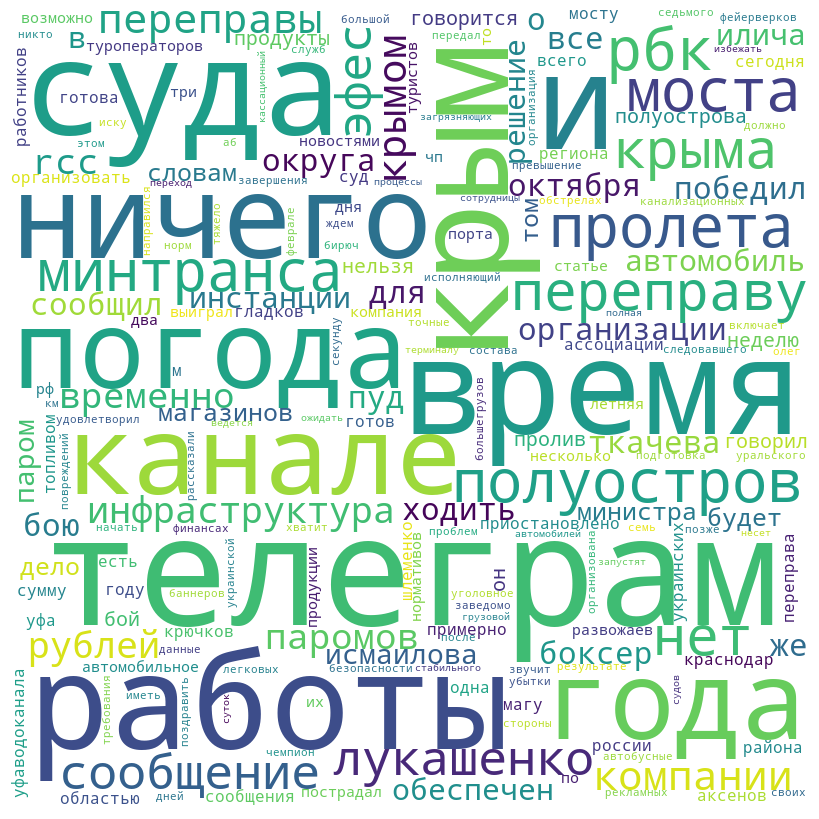

In [28]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
#df = pd.read_csv(r"rbk_data.csv", encoding ="utf-8")
df = pd.read_csv(r"rbc_01.09.2022_07.10.2022.csv", encoding ="utf-8")

comment_words = ''
stop = ["из","за","на","с"]
stopwords = set(stop)
a = []
# iterate through the csv file
for val in df.text:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower().strip()
    a += tokens
    #comment_words += " ".join(tokens)+" "
#print(comment_words)
a = set(a)
a = " ".join(list(a)) + " "
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(a)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()